In [1]:
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [29]:
cd

C:\Users\home


In [37]:
dataset = pd.read_csv (r"F:\user_data.csv") 
dataset

EmptyDataError: No columns to parse from file

In [1]:
import pandas as xc
testdata = xc.read_csv(r"F:\data1.csv")
testdata





,User id,Gender,AGE,ESTIMATEDSalary,Purchased
0,654,M,15,14000,0
1,545,M,55,85000,0
2,54,F,48,45000,0
3,54578,F,12,56000,0
4,654,M,25,48000,0
5,789,F,24,34000,0
6,754,M,26,78000,1
7,578,F,23,55000,0
8,75,M,22,74000,1
9,4,F,35,55000,0


In [69]:
x = testdata.iloc[:, [2, 3]].values 
  
# output 
y = testdata.iloc[:, 4].values 

In [44]:
print(x)

[[    15  14000]
 [    55  85000]
 [    48  45000]
 [    12  56000]
 [    25  48000]
 [    24  34000]
 [    26  78000]
 [    23  55000]
 [    22  74000]
 [    35  55000]
 [    35  35000]
 [    28  62000]
 [    29  12000]
 [    37 122000]
 [    47  51000]
 [    54  26000]
 [    22  42000]
 [    14  63000]]


In [45]:
print(y)

[0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0]


In [48]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [50]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train)  
x_test = sc_x.transform(x_test) 
  
print (x_train[0:10, :]) 

[[-0.2599418  -0.02887136]
 [ 1.63573134 -0.14146968]
 [-0.50720352 -0.254068  ]
 [-1.16656809  0.53412022]
 [ 0.56426391  0.23385804]
 [-0.42478294  0.23385804]
 [ 0.72910505  2.74855378]
 [-0.01268009  0.49658745]
 [-1.33140923  0.27139081]
 [-1.08414751 -1.30498562]]


In [51]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train) 

C:\Users\home\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = classifier.predict(x_test) 

In [53]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[2 0]
 [3 0]]


In [55]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.4


In [71]:
import statsmodels.formula.api as smf
ml1=smf.ols("Purchased ~AGE+ESTIMATEDSalary",data=testdata).fit()

In [72]:
print(ml1.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.4683
Date:                Mon, 19 Aug 2019   Prob (F-statistic):              0.635
Time:                        12:16:18   Log-Likelihood:                -10.539
No. Observations:                  18   AIC:                             27.08
Df Residuals:                      15   BIC:                             29.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3671      0.353     

In [74]:
import statsmodels.formula.api as smf
log_ml1=smf.ols("Purchased ~np.log(AGE+ESTIMATEDSalary)",data=testdata).fit()
print(log_ml1.summary())

                            OLS Regression Results                            
Dep. Variable:              Purchased   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.6457
Date:                Mon, 19 Aug 2019   Prob (F-statistic):              0.433
Time:                        12:19:59   Log-Likelihood:                -10.728
No. Observations:                  18   AIC:                             25.46
Df Residuals:                      16   BIC:                             27.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [75]:
import statsmodels.formula.api as smf
log1_ml1=smf.ols("np.log(Purchased) ~AGE+ESTIMATEDSalary",data=testdata).fit()
print(log1_ml1.summary())

<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log


                            OLS Regression Results                            
Dep. Variable:      np.log(Purchased)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Aug 2019   Prob (F-statistic):                nan
Time:                        12:21:38   Log-Likelihood:                    nan
No. Observations:                  18   AIC:                               nan
Df Residuals:                      15   BIC:                               nan
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept              nan        nan     

C:\Users\home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\home\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\home\Anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,
C:\Users\home\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1594: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


In [76]:
import statsmodels.formula.api as smf
log2_ml1=smf.ols("np.sqrt(Purchased) ~np.sqrt(AGE+ESTIMATEDSalary)",data=testdata).fit()
print(log2_ml1.summary())

                            OLS Regression Results                            
Dep. Variable:     np.sqrt(Purchased)   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.4397
Date:                Mon, 19 Aug 2019   Prob (F-statistic):              0.517
Time:                        12:23:29   Log-Likelihood:                -10.840
No. Observations:                  18   AIC:                             25.68
Df Residuals:                      16   BIC:                             27.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [78]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.4


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


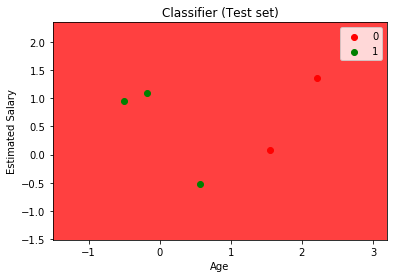

In [79]:
from matplotlib.colors import ListedColormap 
X_set, y_set = x_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,  
                               stop = X_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = X_set[:, 1].min() - 1,  
                               stop = X_set[:, 1].max() + 1, step = 0.01)) 
  
plt.contourf(X1, X2, classifier.predict( 
             np.array([X1.ravel(), X2.ravel()]).T).reshape( 
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 
  
plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 
  
for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label = j) 
      
plt.title('Classifier (Test set)') 
plt.xlabel('Age') 
plt.ylabel('Estimated Salary') 
plt.legend() 
plt.show() 